In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import sqlite3
import re

In [ ]:
## Create Table for asset prices
conn = sqlite3.connect("Asset_Database")
c = conn.cursor()


In [31]:

## Create Tables
table_name = 'daily_prices'
c.execute(f"""
        CREATE TABLE IF NOT EXISTS {table_name}
        ([asset_ticker] TEXT,
         [date] TEXT
         [price] REAL)
          """)
conn.commit()

## Create table with all assets
table_name = 'assets'
c.execute(f"""
        CREATE TABLE IF NOT EXISTS {table_name}
        ([ticker] TEXT,
         [name] TEXT
         [sector] REAL
         [employees] INTEGER
         [country] TEXT
         [industry] TEXT,
         [asset_type] TEXT)
          """)
conn.commit()

## load all tickers in list
ticker_list = []
with open('asset_list.txt', 'r', encoding='utf-8') as f:
    Lines = f.readlines()
    for lines in Lines:
        ticker = lines.split(" ")[0]
        ticker_list.append(ticker)

## create dataframe
df_assets = pd.DataFrame(columns=['ticker', 'name', 'sector', 'employees', 'country', 'asset_type'])

def ticker_check(ticker):
    """"
    Function: Ticker Checker
    Überprüft ob der Ticker existiert. Wenn nicht wird mit den gängigsten Anhängen versucht den gültigen Ticker zu identifizieren    
    """
    ticker = re.sub('[^A-Za-z0-9]+', '', ticker)
    for i in ["",".SW", ".L", ".MI", ".DE", ".F", ".VI"]:
        asset = yf.Ticker(ticker + i)
        if asset.info:
            return ticker + i, True
        else:
            return ticker, False

## Loop über alle Ticker in der Ticker Liste. Von yf werden die benötigten Informationen bezogen
not_found = []
for ticker in ticker_list:
    print(ticker)
    ticker, condition = ticker_check(ticker)
    if not condition:
        not_found.append(ticker)
        continue
    
    asset = yf.Ticker(ticker)
    info = asset.info
    d = {}
    for element in ['longName', 'industry', 'sector', 'fullTimeEmployees', 'country', 'quoteType']:
        try:
            d[element] = info[element]
        except:
            d[element] = None
 
    df_assets = df_assets.append({'ticker': ticker,
                                  'name': d['longName'],
                                  'industry': d['industry'],
                                  'sector': d['sector'],
                                  'employees': d['fullTimeEmployees'],
                                  'country': d['country'],
                                  'asset_type': d['quoteType']}, ignore_index=True)

table_name = 'assets'
r_df = pd.read_sql(f"select * from {table_name}",conn)
table_name = 'daily_prices'
for ticker in r_df['ticker']:
    asset = yf.Ticker(ticker)
    prices = asset.history(period="max")[['Close']]
    prices['ticker'] = ticker
    prices = prices.reset_index()[['ticker', 'Date', 'Close']]
    prices.columns = ['asset_ticker', 'date', 'price']
    prices.to_sql(table_name, conn, if_exists='append')

MMM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ABBN
- ABBN: No summary info found, symbol may be delisted
ACN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ACLN
- ACLN: No summary info found, symbol may be delisted
AC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ATVI


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ADEN
- ADEN: No summary info found, symbol may be delisted
ADS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


- ADS: No summary info found, symbol may be delisted
ADBE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AF
- AF: No summary info found, symbol may be delisted
Al


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ABNB


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AIR


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ALC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ALV


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GOOG


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ALO
- ALO: No summary info found, symbol may be delisted
AMZN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AMD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AAL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AXP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AMGN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AMS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BUD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AAPL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AMAT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ASML


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AML


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


AZN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


T


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BALN
- BALN: No summary info found, symbol may be delisted
BAC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BCGE
- BCGE: No summary info found, symbol may be delisted
BCVN
- BCVN: No summary info found, symbol may be delisted
BAS
- BAS: No summary info found, symbol may be delisted
BSKP
- BSKP: No summary info found, symbol may be delisted
BAYN
- BAYN: No summary info found, symbol may be delisted
BELL
- BELL: No summary info found, symbol may be delisted
BRK/B
- BRKB: No summary info found, symbol may be delisted
BEKN
- BEKN: No summary info found, symbol may be delisted
BYND


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BHP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BNTX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BKW


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BLK


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SQ


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BMW
- BMW: No summary info found, symbol may be delisted
BNP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BOBNN
- BOBNN: No summary info found, symbol may be delisted
BA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BKNG


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BVB


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BATS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BP.


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BMBL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BRBY
- BRBY: No summary info found, symbol may be delisted
CALN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CCL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CAT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CVX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CDI


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CSCO


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


C


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CLN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


KO


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


COIN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CMCSA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CBK
- CBK: No summary info found, symbol may be delisted
COST


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ACA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CSGN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


5CV
- 5CV: No summary info found, symbol may be delisted
DAI


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


DELL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


DAL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


DBK
- DBK: No summary info found, symbol may be delisted
DPW
- DPW: No summary info found, symbol may be delisted
DTE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


DUFN
- DUFN: No summary info found, symbol may be delisted
EOAN
- EOAN: No summary info found, symbol may be delisted
EZJ


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


EBAY


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


EDF


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


EA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


LLY


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


EMMN
- EMMN: No summary info found, symbol may be delisted
EMSN
- EMSN: No summary info found, symbol may be delisted
ENEL
- ENEL: No summary info found, symbol may be delisted
ENGI
- ENGI: No summary info found, symbol may be delisted
ENI


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


EL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ETSY


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


EXPE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


XOM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


FDX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


RACE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


FI-N


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


FHZN
- FHZN: No summary info found, symbol may be delisted
FL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


F


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GPS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GEBN
- GEBN: No summary info found, symbol may be delisted
GE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GIS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GIVN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GSK


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GLEN
- GLEN: No summary info found, symbol may be delisted
GS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GPRO


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


HOG


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


HAS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


HEIO
- HEIO: No summary info found, symbol may be delisted
HFG
- HFG: No summary info found, symbol may be delisted
HELN
- HELN: No summary info found, symbol may be delisted
RMS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


HOLN
- HOLN: No summary info found, symbol may be delisted
HD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


HMC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


HON


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


HSBA
- HSBA: No summary info found, symbol may be delisted
BOSS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


IBM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


IDIA
- IDIA: No summary info found, symbol may be delisted
IMPN
- IMPN: No summary info found, symbol may be delisted
INGA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


INTC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


INTU


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


DE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


JNJ


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


JPM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


BAER
- BAER: No summary info found, symbol may be delisted
JUVE
- JUVE: No summary info found, symbol may be delisted
K


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


KER
- KER: No summary info found, symbol may be delisted
KMB


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


KHC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


KUD
- KUD: No summary info found, symbol may be delisted
KNIN
- KNIN: No summary info found, symbol may be delisted
OR


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


LIN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


LISN
- LISN: No summary info found, symbol may be delisted
LLOY
- LLOY: No summary info found, symbol may be delisted
LMT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


LOGN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


LONN
- LONN: No summary info found, symbol may be delisted
LCID


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


LHA
- LHA: No summary info found, symbol may be delisted
LULU


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


LUKN
- LUKN: No summary info found, symbol may be delisted
MC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MSGE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MANU


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MKS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MAR


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MTCH


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MCD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MRK


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


FB


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MU


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MSFT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MRNA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MONC
- MONC: No summary info found, symbol may be delisted
MDLZ


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MUV2
- MUV2: No summary info found, symbol may be delisted
NESN
- NESN: No summary info found, symbol may be delisted
NFLX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


NKE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


NKLA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


NCLH


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


NOVN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


NVAX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


NVDA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ORCL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ORA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


PG


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


PLTR


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


PGHN
- PGHN: No summary info found, symbol may be delisted
PEP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


PFE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


PM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


PHIA
- PHIA: No summary info found, symbol may be delisted
PINS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


PLUG


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


P911
- P911: No summary info found, symbol may be delisted
PUM
- PUM: No summary info found, symbol may be delisted
QCOM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


0
- 0: No summary info found, symbol may be delisted
RNO


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CFR


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


RIO


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


RIVN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


RBLX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ROG


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ROKU


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


RR/
- RR: No summary info found, symbol may be delisted
RWE
- RWE: No summary info found, symbol may be delisted
CRM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SMSN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SANO
- SANO: No summary info found, symbol may be delisted
SANT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SAP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SCHN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SGSN
- SGSN: No summary info found, symbol may be delisted
RDSA
- RDSA: No summary info found, symbol may be delisted
SHOP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SIE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SIKA
- SIKA: No summary info found, symbol may be delisted
SNAP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SNOW


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


GLE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SOON


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SNE
- SNE: No summary info found, symbol may be delisted
SGKN
- SGKN: No summary info found, symbol may be delisted
SRAIL
- SRAIL: No summary info found, symbol may be delisted
SBUX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


STLA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


STMN
- STMN: No summary info found, symbol may be delisted
SUN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


UHR
- UHR: No summary info found, symbol may be delisted
SLHN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SREN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SCMN
- SCMN: No summary info found, symbol may be delisted
SQN
- SQN: No summary info found, symbol may be delisted
TTWO


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TGT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TTM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TMV


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TEMN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TSCO


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TSLA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TKA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TTE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


TUI1
- TUI1: No summary info found, symbol may be delisted
UBER


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


UBI


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


UBSG
- UBSG: No summary info found, symbol may be delisted
UAA


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ULVR
- ULVR: No summary info found, symbol may be delisted
UPS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VALE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VATN
- VATN: No summary info found, symbol may be delisted
VALN


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VACN
- VACN: No summary info found, symbol may be delisted
VIE
- VIE: No summary info found, symbol may be delisted
VZ


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SPCE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VIV


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VOD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VOW
- VOW: No summary info found, symbol may be delisted
VONN
- VONN: No summary info found, symbol may be delisted
WMT


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


DIS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


WBD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


WISE
- WISE: No summary info found, symbol may be delisted
WISH


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


WWE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


WW


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


YUM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ZAL
- ZAL: No summary info found, symbol may be delisted
ITX


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ZM


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ROSE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ZURN
- ZURN: No summary info found, symbol may be delisted
ZNGA
- ZNGA: No summary info found, symbol may be delisted
XMKA
- XMKA: No summary info found, symbol may be delisted
CSEMAS
- CSEMAS: No summary info found, symbol may be delisted
SAUS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


XMBR
- XMBR: No summary info found, symbol may be delisted
CANCDA
- CANCDA: No summary info found, symbol may be delisted
XCHA
- XCHA: No summary info found, symbol may be delisted
MSE
- MSE: No summary info found, symbol may be delisted
SPYW


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CAC


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


XDAX
- XDAX: No summary info found, symbol may be delisted
IWDC
- IWDC: No summary info found, symbol may be delisted
VWRD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VHYL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


INFR


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


MVSH
- MVSH: No summary info found, symbol may be delisted
IWMO
- IWMO: No summary info found, symbol may be delisted
ZGLD
- ZGLD: No summary info found, symbol may be delisted
CSMIB
- CSMIB: No summary info found, symbol may be delisted
XNJP
- XNJP: No summary info found, symbol may be delisted
AMEL


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


EQQQ
- EQQQ: No summary info found, symbol may be delisted
XDNO
- XDNO: No summary info found, symbol may be delisted
CSPXJ
- CSPXJ: No summary info found, symbol may be delisted
ZSIL
- ZSIL: No summary info found, symbol may be delisted
XESP


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


CSSMI
- CSSMI: No summary info found, symbol may be delisted
CHDVD
- CHDVD: No summary info found, symbol may be delisted
CHSPI
- CHSPI: No summary info found, symbol may be delisted
SRECHA
- SRECHA: No summary info found, symbol may be delisted
VUSD


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


XDGU
- XDGU: No summary info found, symbol may be delisted
XLFS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SXLV


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


UDVD
- UDVD: No summary info found, symbol may be delisted
XLBS


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


SXLK


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


VUKE


C:\Users\ruedi\AppData\Local\Temp\ipykernel_21156\1400600094.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_assets = df_assets.append({'ticker': ticker,


ADEN: No data found for this date range, symbol may be delisted
AML: No data found for this date range, symbol may be delisted
BKW: 1d data not available for startTime=-2208994789 and endTime=1673012204. Only 100 years worth of day granularity data are allowed to be fetched per request.
BNP: No data found for this date range, symbol may be delisted
BVB: No data found for this date range, symbol may be delisted
BATS: 1d data not available for startTime=-2208994789 and endTime=1673012213. Only 100 years worth of day granularity data are allowed to be fetched per request.
CALN: No data found for this date range, symbol may be delisted
CDI: 1d data not available for startTime=-2208994789 and endTime=1673012252. Only 100 years worth of day granularity data are allowed to be fetched per request.
CLN: No data found for this date range, symbol may be delisted
CSGN: No data found for this date range, symbol may be delisted
DAI: No data found for this date range, symbol may be delisted
ENI: 1d d

In [112]:
table_name = 'daily_prices'
assets = ("AAPL", "MSFT", "ABNB", "UBER", "KO")
conn = sqlite3.connect("Asset_Database")
c = conn.cursor()
r_df = pd.read_sql(f"select * from {table_name} where asset_ticker IN {assets}",conn)


In [93]:
c.execute(f"""SELECT asset_ticker ,COUNT(price) AS count 
            FROM {table_name} 
            GROUP BY asset_ticker ORDER BY count;""")

c.fetchall()

[('INFR', 1),
 ('MKS', 1),
 ('XLFS', 75),
 ('ROSE', 273),
 ('RIVN', 290),
 ('VALN', 422),
 ('COIN', 437),
 ('RBLX', 461),
 ('BMBL', 479),
 ('XESP', 502),
 ('WISH', 517),
 ('ABNB', 521),
 ('PLTR', 571),
 ('LCID', 579),
 ('SNOW', 581),
 ('MSGE', 691),
 ('BNTX', 816),
 ('UBER', 922),
 ('BYND', 928),
 ('PINS', 937),
 ('ZM', 937),
 ('ALC', 944),
 ('MRNA', 1027),
 ('ACA', 1049),
 ('NKLA', 1152),
 ('SPCE', 1326),
 ('ROKU', 1327),
 ('SNAP', 1473),
 ('BOSS', 1480),
 ('NOVN', 1584),
 ('DELL', 1608),
 ('OR', 1638),
 ('SQ', 1794),
 ('AC', 1801),
 ('RACE', 1815),
 ('KHC', 1891),
 ('SHOP', 1922),
 ('ETSY', 1946),
 ('GPRO', 2148),
 ('MC', 2197),
 ('ITX', 2240),
 ('SANT', 2499),
 ('NCLH', 2509),
 ('SUN', 2590),
 ('MANU', 2618),
 ('Al', 2949),
 ('EDF', 3028),
 ('GM', 3053),
 ('TSLA', 3153),
 ('STLA', 3167),
 ('BUD', 3403),
 ('EZJ', 3421),
 ('TMV', 3456),
 ('PM', 3729),
 ('LULU', 3889),
 ('DAL', 3948),
 ('MA', 4183),
 ('UAA', 4311),
 ('AAL', 4349),
 ('EXPE', 4396),
 ('WBD', 4405),
 ('ORA', 4569),
 ('TTM

In [94]:
r_df['date'] = pd.to_datetime(r_df.date)

In [113]:
r_df = r_df.pivot(columns='asset_ticker', index="date", values='price')

In [96]:
r_df.cov()

asset_ticker,AAPL,ABNB,KO,MSFT,UBER
asset_ticker,,,,,
AAPL,1230.299004,2.972609,489.774757,2467.586800,40.285827
ABNB,2.972609,1012.043645,-100.106153,362.491374,282.785146
KO,489.774757,-100.106153,244.657683,956.407035,-14.586691
MSFT,2467.586800,362.491374,956.407035,4595.772569,101.361712
UBER,40.285827,282.785146,-14.586691,101.361712,96.123364


In [115]:
returns = r_df.pct_change()

<AxesSubplot: xlabel='date'>

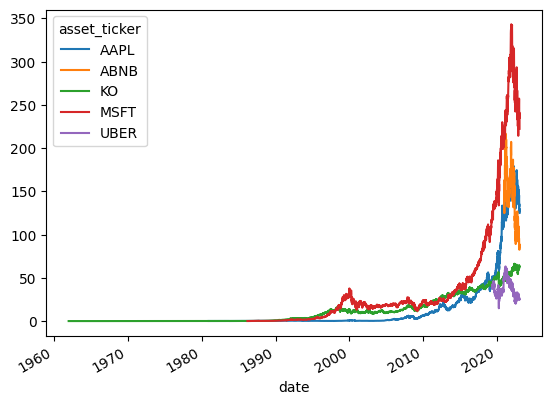

In [98]:
r_df.plot()

In [116]:
import pandas as pd
import numpy as np

def get_optimal_weights(returns):
  # calculate the covariance matrix
  cov_matrix = returns.cov()
  
  # calculate the portfolio variance
  portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
  
  # define a function to minimize
  def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
  
  # constraints 
  constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
  
  # bounds
  bounds = tuple((0,1) for x in range(n_assets))
  
  # initial guess
  initial_guess = [1/n_assets]*n_assets
  
  # minimize the function
  result = minimize(fun=portfolio_volatility, x0=initial_guess, 
                    method='SLSQP', bounds=bounds, 
                    constraints=constraints)
  
  # get the optimal weights
  weights = result['x']
  
  return weights


In [117]:
get_optimal_weights(returns)

UnboundLocalError: cannot access local variable 'weights' where it is not associated with a value